# Analysis of VTEC During Geomagnetically Quiet Conditions
**Observation Period:** May 7, 8, & 9, 2024

## 1.0 Station Locations
This analysis utilizes data from a global network of nine International GNSS Service (IGS) stations. The geodetic coordinates for each station are presented below, grouped by continent.

### 1.1 North America
| Station ID | Latitude | Longitude |
|:---|:---:|:---:|
| **ALGO** | 45.9558° N | 78.0714° W |
| **AMC4** | 38.8031° N | 104.5246° W |
| **CHUR** | 58.7591° N | 94.0887° W |
| **PIE1** | 34.3015° N | 108.1189° W |

### 1.2 South America
| Station ID | Latitude | Longitude |
|:---|:---:|:---:|
| **SANT** | 33.1503° S | 70.6686° W |

### 1.3 Europe
| Station ID | Latitude | Longitude |
|:---|:---:|:---:|
| **ZECK** | 43.7884° N | 41.5651° E |
| **ZIMM** | 46.8771° N | 7.4653° E |

### 1.4 Asia
| Station ID | Latitude | Longitude |
|:---|:---:|:---:|
| **IRKJ** | 52.2190° N | 104.3162° E |
| **SHAO** | 31.0996° N | 121.2004° E |

---

In [1]:
#  Loading all of the data: 
files_to_process = {
    'IRKJ': [
        ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/IRKJ/irkj128-2024-05-07.Cmn', 'May 7'),
        ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/IRKJ/irkj129-2024-05-08.Cmn', 'May 8'),
        ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/IRKJ/irkj130-2024-05-09.Cmn', 'May 9')
    ],
    'PIE1': [
        ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/PIE1/pie1128-2024-05-07.Cmn', 'May 7'),
        ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/PIE1/pie1129-2024-05-08.Cmn', 'May 8'),
        ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/PIE1/pie1130-2024-05-09.Cmn', 'May 9')
    ],
    'SANT': [
        ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/SANT/sant128-2024-05-07.Cmn', 'May 7'),
        ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/SANT/sant129-2024-05-08.Cmn', 'May 8'),
        ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/SANT/sant130-2024-05-09.Cmn', 'May 9')
    ],
    'SHAO': [
        ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/SHAO/shao128-2024-05-07.Cmn', 'May 7'),
        ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/SHAO/shao129-2024-05-08.Cmn', 'May 8'),
        ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/SHAO/shao130-2024-05-09.Cmn', 'May 9')
    ],
    'ZECK': [
        ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ZECK/zeck128-2024-05-07.Cmn', 'May 7'),
        ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ZECK/zeck129-2024-05-08.Cmn', 'May 8'),
        ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ZECK/zeck130-2024-05-09.Cmn', 'May 9')
    ],
    'ZIMM': [
        ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ZIMM/zimm128-2024-05-07.Cmn', 'May 7'),
        ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ZIMM/zimm129-2024-05-08.Cmn', 'May 8'),
        ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ZIMM/zimm130-2024-05-09.Cmn', 'May 9')
    ],
    'ALGO': [
        ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ALGO/algo128-2024-05-07.Cmn', 'May 7'),
        ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ALGO/algo129-2024-05-08.Cmn', 'May 8'),
        ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/ALGO/algo130-2024-05-09.Cmn', 'May 9')
    ],
    'AMC4': [
       ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/AMC4/amc4128-2024-05-07.Cmn', 'May 7'),
        ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/AMC4/amc4129-2024-05-08.Cmn', 'May 8'),
        ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/AMC4/amc4130-2024-05-09.Cmn', 'May 9')
    ],
    'CHUR': [
        ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/CHUR/chur128-2024-05-07.Cmn', 'May 7'),
        ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/CHUR/chur129-2024-05-08.Cmn', 'May 8'),
        ('/home/akash/Desktop/FINAL_YEAR_PROJECT_2025/STATIONS/CHUR/chur130-2024-05-09.Cmn', 'May 9')
    ]
}

In [2]:
# importing the packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates 

In [3]:
# Loading and Merging
list_of_dataframes = []

for station_name, file_list in files_to_process.items():
    for path, day_label in file_list:
        try:
            df = pd.read_csv(path, skiprows=4, sep='\s+')
            df = df[df['Time'] >= 0].dropna()
            
            df['Station'] = station_name
            df['Day'] = day_label
            
            list_of_dataframes.append(df)
        except FileNotFoundError:
            print(f"--> WARNING: File not found and will be skipped: {path}")
        except Exception as e:
            print(f"--> ERROR: Could not process {path}. Reason: {e}")

if not list_of_dataframes:
    print("No data was loaded. Cannot continue.")
else:
    master_df = pd.concat(list_of_dataframes, ignore_index=True)
    print("\nAll files successfully merged into a 'master_df' DataFrame.")
    print(f"Total rows loaded: {len(master_df)}")


All files successfully merged into a 'master_df' DataFrame.
Total rows loaded: 774232


In [4]:
if 'master_df' in locals():
    # Create the 'datetime' column
    master_df['datetime'] = pd.to_datetime(master_df['MJdatet'], unit='D', origin='1858-11-17')
    
    # Sort the entire DataFrame by the new datetime column
    master_df = master_df.sort_values(by='datetime')
    
    print("Final data preparation complete. 'master_df' is now sorted and ready for plotting.")
    master_df.info()
else:
    print("'master_df' not found. Please run the previous cell first.")

Final data preparation complete. 'master_df' is now sorted and ready for plotting.
<class 'pandas.core.frame.DataFrame'>
Index: 774232 entries, 80178 to 232275
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   MJdatet   774232 non-null  float64       
 1   Time      774232 non-null  float64       
 2   PRN       774232 non-null  int64         
 3   Az        774232 non-null  float64       
 4   Ele       774232 non-null  float64       
 5   Lat       774232 non-null  float64       
 6   Lon       774232 non-null  float64       
 7   Stec      774232 non-null  float64       
 8   Vtec      774232 non-null  float64       
 9   S4        774232 non-null  float64       
 10  Station   774232 non-null  object        
 11  Day       774232 non-null  object        
 12  datetime  774232 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 82.7+ MB


Generating custom comparative quiet day plots...


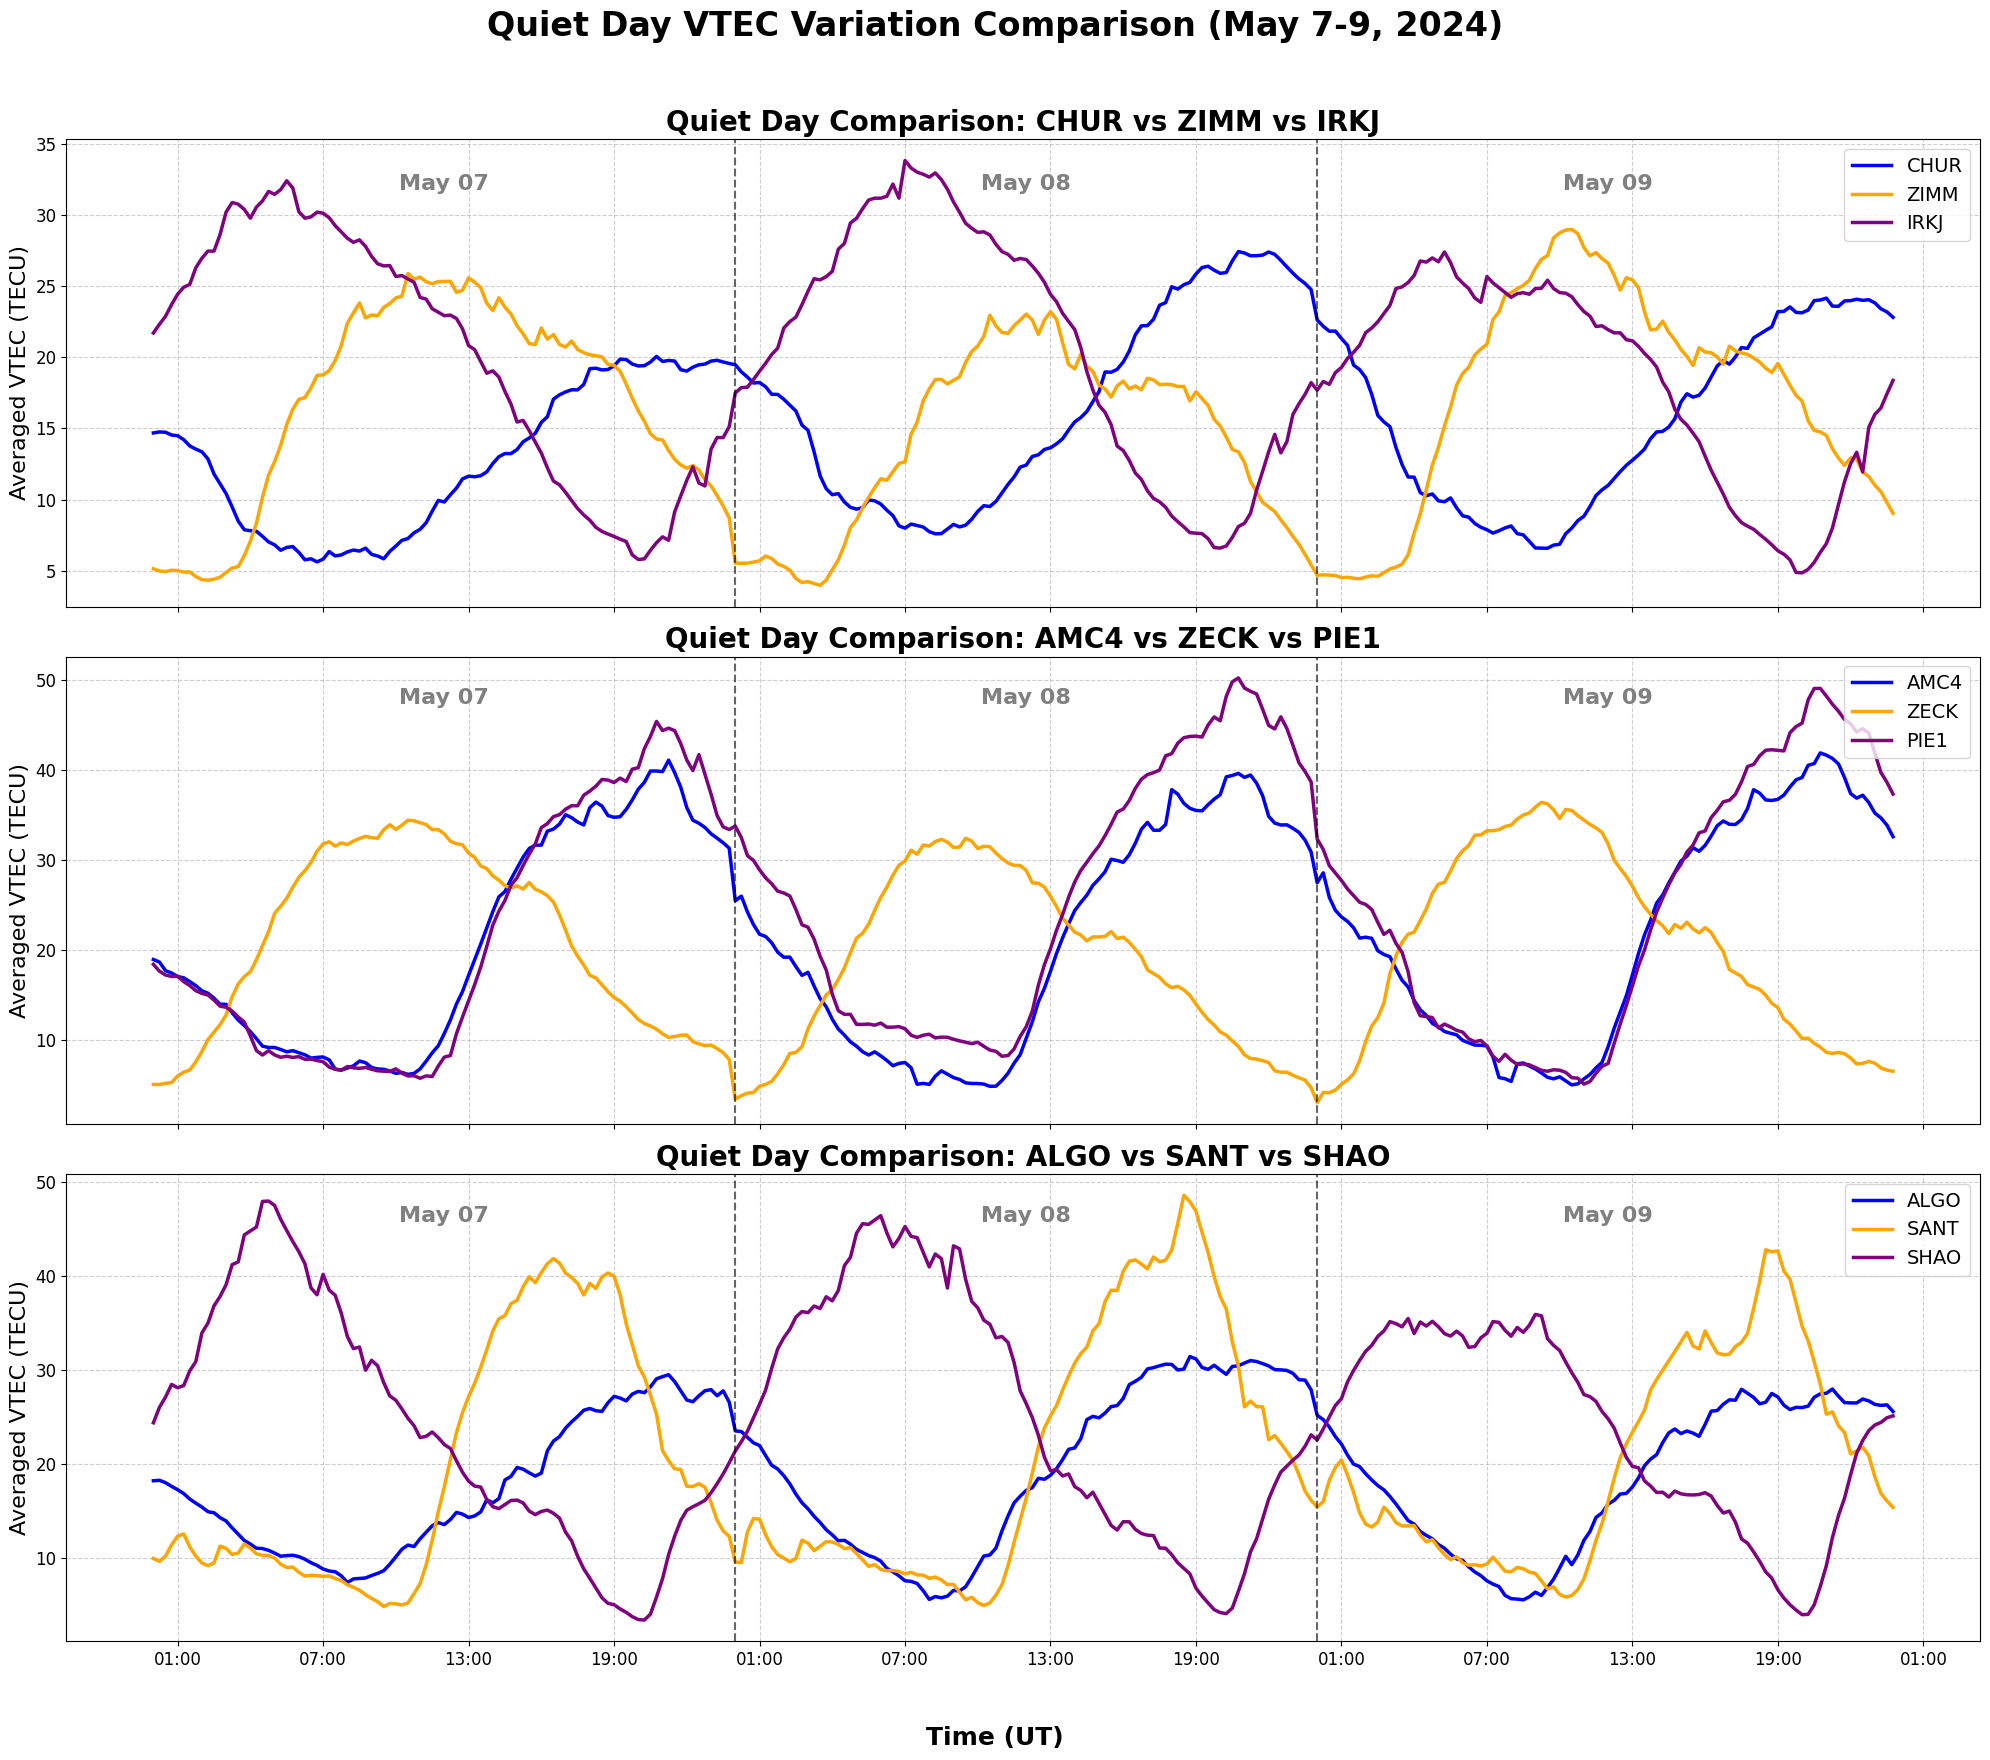


Custom quiet day station groupings:
Subplot 1: CHUR vs ZIMM vs IRKJ
Subplot 2: AMC4 vs ZECK vs PIE1
Subplot 3: ALGO vs SANT vs SHAO

Available stations in quiet day data: ALGO, AMC4, CHUR, IRKJ, PIE1, SANT, SHAO, ZECK, ZIMM


In [6]:
#  Plotting Quiet Day - Custom Station Groups
if 'master_df' in locals():
    # Define specific station groups for comparison
    station_groups = [
        ['CHUR', 'ZIMM', 'IRKJ'],  # 1st plot
        ['AMC4', 'ZECK', 'PIE1'],  # 2nd plot  
        ['ALGO', 'SANT', 'SHAO']   # 3rd plot
    ]
    
    # Create 3x1 subplot grid
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 18), sharex=True)
    
    # Define colors for the 3 stations in each subplot (warmer tones for quiet days)
    colors = ['blue', 'orange', 'purple']
    
    print("Generating custom comparative quiet day plots...")
    
    # Plot each station group
    for i, ax in enumerate(axes):
        current_stations = station_groups[i]
        
        # Plot each station in the current subplot
        for j, station_name in enumerate(current_stations):
            # Check if station exists in the data
            if station_name in master_df['Station'].values:
                station_df = master_df[master_df['Station'] == station_name]
                resampled_data = station_df.set_index('datetime')['Vtec'].resample('15T').mean()
                
                # Plot with different colors for each station
                ax.plot(resampled_data.index, resampled_data.values, 
                       label=f'{station_name}', color=colors[j], linewidth=2.5)
            else:
                print(f"Warning: Station {station_name} not found in quiet day data")
        
        # Add day boundaries (using data from first available station for reference)
        available_stations = [s for s in current_stations if s in master_df['Station'].values]
        if len(available_stations) > 0:
            first_station_df = master_df[master_df['Station'] == available_stations[0]]
            first_resampled = first_station_df.set_index('datetime')['Vtec'].resample('15T').mean()
            
            if not first_resampled.empty:
                day_boundaries = pd.to_datetime(first_resampled.index.date).unique()[1:]
                for boundary in day_boundaries:
                    ax.axvline(x=boundary, color='black', linestyle='--', linewidth=1.5, alpha=0.6)
                    
                unique_days = pd.to_datetime(first_resampled.index.date).unique()
                y_max = ax.get_ylim()[1]
                y_pos = y_max * 0.9
                
                for day in unique_days:
                    pos = pd.to_datetime(day) + pd.Timedelta(hours=12)
                    text = day.strftime('%B %d')
                    ax.text(pos, y_pos, text, ha='center', fontsize=16, 
                           fontweight='bold', color='gray')
        
        # Format x-axis
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        
        # Set labels and formatting
        ax.set_title(f"Quiet Day Comparison: {' vs '.join(current_stations)}", fontsize=20, weight='bold')
        ax.set_ylabel("Averaged VTEC (TECU)", fontsize=16)
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.legend(fontsize=14, loc='upper right')
        ax.tick_params(axis='both', which='major', labelsize=12)
    
    # Add main labels
    fig.text(0.5, 0.02, 'Time (UT)', ha='center', va='center', fontsize=18, weight='bold')
    fig.suptitle("Quiet Day VTEC Variation Comparison (May 7-9, 2024)", 
                 fontsize=24, weight='bold')
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.96])
    plt.savefig('/home/akash/Desktop/VTEC-May-2024-Final-Year-Project-2025-/PLOTS/vtec_plot_for_quiet_days.pdf', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print station groupings for reference
    print("\nCustom quiet day station groupings:")
    for i, group in enumerate(station_groups):
        print(f"Subplot {i+1}: {' vs '.join(group)}")
        
    # Check which stations are available in the data
    all_stations_in_data = master_df['Station'].unique()
    print(f"\nAvailable stations in quiet day data: {', '.join(sorted(all_stations_in_data))}")
        
else:
    print("'master_df' not found. Please run the previous cells first.")